# 1. 정규식

## 🧰 Python `re` 모듈 주요 함수 요약

### 1. `re.sub(pattern, repl, string)`

* **패턴에 맞는 문자열을 다른 문자열로 바꾼다** (substitute)
* 자주 쓰임! → 텍스트 전처리, 필터링, 치환 등에 유용

```python
re.sub(r'[^가-힣 ]', '', 'Hello 안녕하세요!')  
# 결과: '안녕하세요'
```

### 2. `re.search(pattern, string)`

* **문자열 내에서 패턴과 일치하는 첫 번째 match 객체를 반환**
* 결과가 없으면 `None` 반환

```python
match = re.search(r'\d+', '상품번호 1234번')
print(match.group())  # 결과: '1234'
```

### 3. `re.match(pattern, string)`

* 문자열의 **시작 부분**부터 패턴이 일치하는지 확인
* 중간에 있는 건 무시됨

```python
re.match(r'abc', 'abcdef')  # ✅ 일치
re.match(r'abc', '123abc')  # ❌ 일치 안 함
```

### 4. `re.findall(pattern, string)`

* **일치하는 모든 문자열을 리스트로 반환**

```python
re.findall(r'\d+', '전화번호는 010-1234-5678입니다')
# 결과: ['010', '1234', '5678']
```

### 5. `re.split(pattern, string)`

* 패턴을 기준으로 **문자열을 분리(split)**

```python
re.split(r'[,.!?]', '안녕, 잘 지냈어? 오늘 날씨 좋다!')
# 결과: ['안녕', ' 잘 지냈어', ' 오늘 날씨 좋다', '']
```

---

## 🔄 비교: `str.replace()` vs `re.sub()`

| 함수                  | 특징                                      |
| ------------------- | --------------------------------------- |
| `str.replace(a, b)` | **고정된 문자열 a**를 **b로 치환**. 정규식 사용 ❌      |
| `re.sub(p, b, s)`   | **패턴 p에 일치하는 문자열**을 **b로 치환**. 정규식 사용 ⭕ |

### 예시 비교

```python
text = "123abc456"

# 숫자 제거 (정규식)
re.sub(r'\d+', '', text)  # 결과: 'abc'

# 고정된 문자열 제거 (정규식 아님)
text.replace("123", "")   # 결과: 'abc456'
```



- 실습
    - 다양한 전화번호 형식을 `___-____-____`로 바꾸어주는 정규식?

In [ ]:
s = input().strip()
print(f'initial: {s}')
import re
# Regular expression to match the phone number format
if re.fullmatch(r"^0\d{1,2}-\d{3,4}-\d{4}$", s):
    print(f'Matched: {s}')
else:
    print("Invalid")
    
# 해설:
# 위 정규식을 해석하면 아래와 같습니다.
# - `^` 문자열의 시작을 나타냅니다.
# - `0` 숫자 '0'을 매칭합니다.
# - `\d{1,2}` 1자리 또는 2자리 숫자를 매칭합니다 (지역번호).
# - `-` 하이픈을 매칭합니다.
# - `\d{3,4}` 3자리 또는 4자리 숫자를 매칭합니다 (전화번호의 첫 번째 부분).
# - `-` 하이픈을 매칭합니다.
# - `\d{4}` 정확히 4자리 숫자를 매칭합니다 (전화번호의 두 번째 부분).
# - `$` 문자열의 끝을 나타냅니다.

- 문장에서 한글을 제외한 모든 문자 제거하기

In [ ]:
s = input().strip()
import re
# Regular expression to remove all characters except Korean Characters in the string
s = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '', s)
print(s)

# 해설:
# 위 정규식은 문자열에서 한글과 공백을 제외한 모든 문자를 제거합니다.
# sub 함수 - 위 정규식에 매칭하는 모든 문자를 빈 문자열로 대체합니다.
# `[]` : 매칭할 문자들의 집합
# `^` : 부정. 집합에 포함시키지 않을 문자
# `가-힣` : 한글 음절
# - `ㄱ-ㅎ`: 한글 자음
# - `ㅏ-ㅣ`: 한글 모음
# - ` `: 공백 문자

faaawofㅈㅁㅓㅈㅇㅓ;ㅐㅈㅇ198efh210efh


## 한글 형태소 분석기 KoNLPy

- 다양한 내부엔진 존재
    - Hannanum (KAIST)
    - Kkma (SNU)
    - Komoran (SHINEWARE)
    - Mecab (mecab-ko)
    - Okt (twitter)
        
- KSS
    -Korean Sentence Splitter

- Okt 사용 예제제

# Wordcloud

## -  단어의 빈도수를 시각적으로 표현
- 빈도수가 높은 단어일수록 크게 표시
- 예시
    - SNS 분석
    - 고객 의견 시각화
    - 뉴스 기사 주요 키워드 추출
    - 여론조사/리뷰데이터 분석

## - 사용법

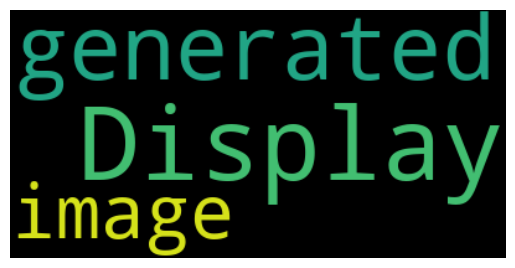

In [5]:
from wordcloud import WordCloud

text = input("Enter text for word cloud: ")

# wordcloud 이미지 생성
wordcloud = WordCloud().generate(text)

# wordcloud 이미지 디스플레이
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 축 제거
plt.show()

## 실습
- Web Scraping 실습으로 수집한 기사의 실질내용(타이틀, url)을 수집하여 불용어 등을 제거하고, 명사를 대상으로 wordcloud 작성하기

### 1. 키워드 웹스크래핑 및 CSV로 저장

In [7]:
import time
import random
from selenium import webdriver
from selenium.webdriver.common.by import By
import csv

options = webdriver.ChromeOptions()
options.add_argument("--headless=new")  # run in headless mode
driver = webdriver.Chrome(options=options)


# 결과 저장용 리스트
extracted_articles = []


url = "https://m.sports.naver.com/index"
driver.get(url)
time.sleep(random.uniform(2, 3))  # 페이지 로딩 대기

# 무한로딩을 방지하기 위한 조건 설정
max_scrolls = 15         # 최대 스크롤 횟수
stuck_limit = 3          # 콘텐츠 변화 없음 허용 횟수
max_articles = 100       # 최대 기사 수
scrolls = 0
stuck_count = 0

# 스크롤 크기 구하기
scroll_height = driver.execute_script("return document.body.scrollHeight")
print("스크롤 높이:", scroll_height)

while scrolls < max_scrolls and stuck_count < stuck_limit and len(extracted_articles) < max_articles:
    # 스크롤 내리기
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(random.uniform(2, 3))

    # 스크롤 후 높이 확인
    new_scroll_height = driver.execute_script("return document.body.scrollHeight")
    
    if new_scroll_height == scroll_height:
        stuck_count += 1
    else:
        stuck_count = 0
        scroll_height = new_scroll_height

    scrolls += 1

    # 현재까지 로드된 기사들
    articles = driver.find_elements(By.CSS_SELECTOR, "div.mfc_tmplfeedmixed_template_body")
    
    for article in articles:
        try:
            image = article.find_element(By.CSS_SELECTOR, "span.mfc_elemimagerectangle_image_box img").get_attribute("src")
            title = article.find_element(By.CSS_SELECTOR, ".mfc_comptextcard_text_title").text
            link = article.find_element(By.CSS_SELECTOR, "a.mfc_modmarginfixed_margin_thumb_link").get_attribute("href")
            channel = article.find_element(By.CSS_SELECTOR, ".mfc_compchannelsmall_channel_name").text

            article_data = {
                "title": title,
                "image": image,
                "url": link,
                "channel": channel,
            }

            # 중복 방지
            if article_data not in extracted_articles:
                extracted_articles.append(article_data)

        except Exception as e:
            continue

        if len(extracted_articles) >= max_articles:
            break

    
# 결과 출력
print(f"총 수집된 기사 수: {len(extracted_articles)}")
    
csv_file = "articles.csv"
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["title", "image", "url", "channel"])
    writer.writeheader()
    for article in extracted_articles:
        writer.writerow(article)
        
print(f"저장 완료: {csv_file}")
    
# 드라이버 종료 
driver.quit()


스크롤 높이: 4830
총 수집된 기사 수: 100
저장 완료: articles.csv


### 2. KoNLPy 통한 한글 형태소 분석

1. KoNLPy 설치 준비
    - JAVA기반이므로 JDK 설치 후 환경변수 등록
    - conda 환경에 Java환경을 사용할 수 있도록 설정
        `conda install -c conda-forge jpype1`
2. KoNLPy 설치
    `pip install konlpy`

In [ ]:
!pip install konlpy

3. JAVA가 제대로 잡히는지 확인

In [1]:
import os
print(os.environ.get("JAVA_HOME"))

C:\Program Files\Java\jdk-24\bin\server


3.1. 안잡힌다면, jvm_path 설정      

In [4]:
import jpype
jvm_path = r"C:\Program Files\Java\jdk-24\bin\server\jvm.dll"  # 본인 JDK 경로에 맞게 수정
if not jpype.isJVMStarted():
    jpype.startJVM(jvm_path)

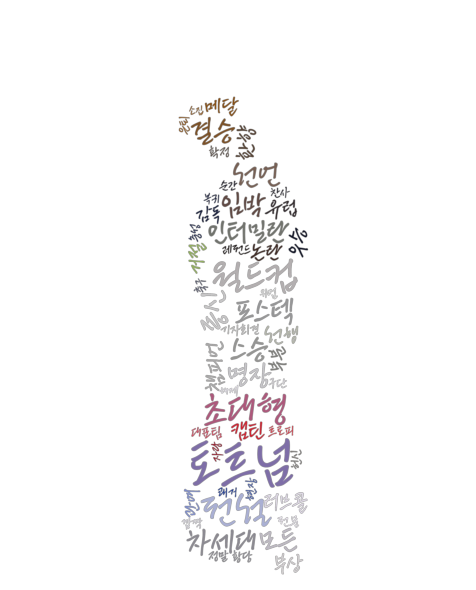

워드클라우드 이미지가 wc3.png로 저장되었습니다.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from konlpy.tag import Okt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image, ImageOps

# CSV 파일 경로
csv_file = "articles.csv"

# CSV 파일이 존재하는지 확인
if not os.path.exists(csv_file):
    print(f"CSV 파일이 존재하지 않습니다: {csv_file}")

# CSV 파일 읽기
df = pd.read_csv(csv_file, encoding='utf-8')

# 기사 제목 중 '손흥민'이 포함된 기사만 필터링
filtered_df = df[df['title'].str.contains('손흥민', na=False)]

# Okt 형태소 분석기 초기화
okt = Okt()


# 모든 제목 합치기
text = ' '.join(filtered_df['title'].astype(str))

# 명사만 추출
nouns = okt.nouns(text)

stopwords = set([
    '손흥민', '관련', '대한', '있다', '오늘', '이번', '기자', '사진', '제공', 
    '뉴스', '리그', '경기', '선수', '한다', '에서', '하며', '해도', '이다', '로서',
    '까지', '또한', '하면', '그러나', '이어', '위해', '앞서', '그리고', '때문', 
    '이후', '가장', '그는', '그녀', '지난', '다시', '자신', '이번엔', '장면', 
    '모습', '중인', '된', '더', '새로운', '등', '속', '또', '한편', '무대', 
    '상대', '개최', '전반', '후반', '동안', '종료', '앞두고', '상대로', '상황', 
    '통해', '수준', '기록', '전달', '대해', '관련해', '결별', '사생활','중국', '홍명보','오피'
])

stopwords = STOPWORDS.union(stopwords)

# 명사에서 불용어 제거 및 길이가 1보다 큰 단어만 필터링
filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

word_freq = Counter(filtered_nouns)


# 이미지 로딩 (한 번만)
original_image = Image.open("C:/Users/User/Downloads/GrgN4yeXAAA1EBj_removed_bg.png")

# === 마스킹 처리 ===
mask_rgba = original_image.convert("RGBA")
alpha = mask_rgba.split()[-1]
inverted_alpha = ImageOps.invert(alpha)
mask_image = np.array(inverted_alpha)

# === 색상 추출 (원본 이미지 사용) ===
original_image_array = np.array(original_image)
image_colors = ImageColorGenerator(original_image_array)

# 워드클라우드 생성
wc = WordCloud(
    font_path="C:/Users/User/AppData/Local/Microsoft/Windows/Fonts/KCC-Imkwontaek.otf",
    mask=mask_image,
    background_color=None,
    mode="RGBA",
    width=800,
    height=400
)

# 워드클라우드에 단어 빈도수 적용
wordcloud = wc.generate_from_frequencies(word_freq)

# 원본 이미지 색상 적용
colored_wordcloud = wordcloud.recolor(color_func=image_colors)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(colored_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


saving_name = "wc3.png"
colored_wordcloud.to_file(f"C:/Users/User/Downloads/{saving_name}")
print(f"워드클라우드 이미지가 {saving_name}로 저장되었습니다.")

### 배경이미지 제거하는 코드

In [12]:
# !pip install rembg
# !pip install onnxruntime

from rembg import remove
from PIL import Image
image_path = "C:/Users/User/Downloads/wc.png"
input_image = Image.open(image_path)
output_image = remove(input_image)
output_path = "C:/Users/User/Downloads/wc_removed_bg.png"
output_image.save(output_path)
print(f"배경 제거된 이미지가 저장되었습니다: {output_path}")


배경 제거된 이미지가 저장되었습니다: C:/Users/User/Downloads/wc_removed_bg.png
